# Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. Ideally, we can find a comfortable place with an affordable price on Airbnb when traveling. In this project, we will use data provide by Kaggle to analyze how to make an informed decision when booking.

### Questions to answer from the data
1. What are the busiest times of the year to visit Seattle? Will prices fluctuate with visitor tendency?
2. What are the neighborhoods most requested by Airbnb customers?
3. What characteristics affects the price of a listing? 

In [2]:
import warnings
warnings.filterwarnings("ignore")

#import required packages
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# Gather Data

- reviews: summary review data for the listing
- calendar: calendar data from the listing
- listing: summary information on listing in Seattle

In [3]:
reviews = pd.read_csv("/Users/ante/Desktop/reviews.csv")
listing = pd.read_csv("/Users/ante/Desktop/listings.csv")
calendar = pd.read_csv("/Users/ante/Desktop/calendar.csv")

# Set option to show all columns while using head
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", -1)

In [4]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0  7202016     38917982  2015-07-19  28943674     Bianca         
1  7202016     39087409  2015-07-20  32440555     Frank          
2  7202016     39820030  2015-07-26  37722850     Ian            
3  7202016     40813543  2015-08-02  33671805     George         
4  7202016     41986501  2015-08-10  34959538     Ming           

                                                                                                                                                                                                                                                                                                                                                                                                         comments  
0  Cute and cozy place. Perfect location to everything!                                                                                                                                                                                                                                                                                                                                                            
1  Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.  
2  Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday      
3  Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.                                                                                                                           
4  Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!

In [5]:
listing.head()

id                           listing_url       scrape_id last_scraped  \
0  241032   https://www.airbnb.com/rooms/241032   20160104002432  2016-01-04    
1  953595   https://www.airbnb.com/rooms/953595   20160104002432  2016-01-04    
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432  2016-01-04    
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432  2016-01-04    
4  278830   https://www.airbnb.com/rooms/278830   20160104002432  2016-01-04    

                                  name  \
0  Stylish Queen Anne Apartment          
1  Bright & Airy Queen Anne Apartment    
2  New Modern House-Amazing water view   
3  Queen Anne Chateau                    
4  Charming craftsman 3 bdm house        

                                                                                                                                                                                                                                                     summary  \
0  NaN                                                                                                                                                                                                                                                         
1  Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria.  No smoking, no pets.  Designed for healthy living, so breathe easy.   
2  New modern house built in 2013.  Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen.  Perfect for 2-3 families, walk to downtown.  Located in highly desirable Queen Anne neighborhood.           
3  A charming apartment that sits atop Queen Anne hill, northwest facing bay windows with warm afternoon light setting over the Olympic Cascades. The space is perfect for one or two but can accommodate up to three on the fold-out memory foam cot.         
4  Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedrooms, can accomodate up to 6 people. 1,200 sq. feet space is your oasis. Perfect location!                                                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      space  \
0  Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be dow

In [6]:
calendar.head()

listing_id        date available   price
0  241032      2016-01-04  t         $85.00
1  241032      2016-01-05  t         $85.00
2  241032      2016-01-06  f         NaN   
3  241032      2016-01-07  f         NaN   
4  241032      2016-01-08  f         NaN

# Exploratory Data Analysis

In [7]:
#shape of all dataframes
print ('reviews : ' + str(reviews.shape))
print('listing : ' + str(listing.shape))
print('calendar : ' + str(calendar.shape))

reviews : (84849, 6)
listing : (3818, 92)
calendar : (1393570, 4)


In [8]:
#check all dataframes columns type 
reviews.dtypes.value_counts()

int64     3
object    3
dtype: int64

In [9]:
listing.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [10]:
calendar.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
#check missing value in all dataframes
#reviews
reviewmissvalue = reviews.isnull().mean()
reviewmissvalue

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [12]:
#calendar
calendarmissvalue = calendar.isnull().mean()
calendarmissvalue

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

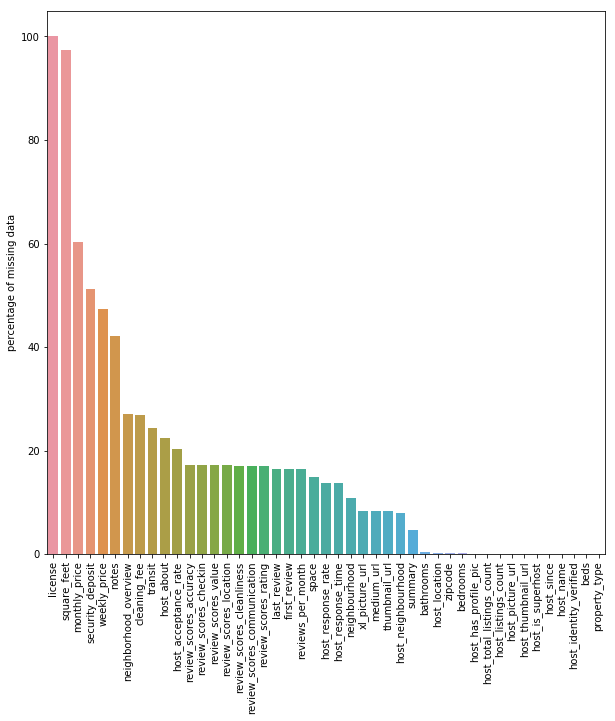

In [13]:
#listing
colmissvalue = listing.columns[listing.isnull().mean() != 0]
listing_missingvalue = listing.loc[:, colmissvalue]
#plot the percentage of missing data for the columns in listing
missing_value = (listing_missingvalue.isnull().sum() * 100/listing_missingvalue.shape[0]).sort_values(ascending = False)
plt.figure(figsize = (10,10))
sns.barplot(missing_value.index, missing_value.values)
plt.xticks(rotation = 'vertical')
plt.ylabel('percentage of missing data')
# Save the PNG file on folder
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/percentage of missing data in list.png')

plt.show()

### Exploratory with Visualization¶
### What are the busiest times of the year to visit Seattle? Will prices fluctuate with visitor tendency?
When it comes to Seattle’s busiest travel season, many vistors plan ahead and try to stay ahead of their availability windows. Adverse, vacancies become more during not busy time, so availablity of hosting will be a good standard for us to observe busiest times of general Seattle Airbnb market. Otherwise, lower occupany rate might cause less provider, so availability rate can provide more accurate data than just availability.

In [14]:
# format price columns for visualization: Convert price from str to num
def col_moneyformat(data, col):
    ''' transform money label to float
    
    inputs:data = pd.DataFrame
           col = list of columns
        
    outputs: pd.DataFrame 
    '''
    data[col] = data[col].str.replace('$', '').str.replace(',', '').astype('float')
    return data

calendar = col_moneyformat(calendar, 'price')

In [15]:
# list available hosting in each month and relative rate
df_busy = calendar.loc[calendar['date'] <'2017-01-01']
df_busy['month'] = pd.DatetimeIndex(df_busy['date']).month
df_busy_available = df_busy.loc[df_busy['available'] == 't']

monthly_list = pd.DataFrame(dtype='object')
monthly_list_all = pd.DataFrame(dtype = 'object')
monthly_avail = df_busy_available.groupby(by = ['month'], as_index = True)['listing_id'].nunique()
monthly_all = df_busy.groupby(by = ['month'], as_index = True)['listing_id'].nunique()

monthly_list = pd.DataFrame(monthly_avail)
monthly_list_all = pd.DataFrame(monthly_all)

#remove index
monthly_list.reset_index(level=0, inplace=True)
monthly_list_all.reset_index(level=0, inplace=True)

monthly_avail_all = pd.merge(monthly_list, monthly_list_all, on = 'month')
monthly_avail_all.rename(columns = {'listing_id_x': 'available', 'listing_id_y': 'all'}, inplace = True)
monthly_avail_all['available_rate'] = monthly_avail_all['available']/monthly_avail_all['all']

In [16]:
monthly_avail_all.head()

month  available   all  available_rate
0  1      2868       3818  0.751179      
1  2      2895       3818  0.758250      
2  3      2950       3818  0.772656      
3  4      3002       3818  0.786276      
4  5      2705       3818  0.708486

since every month have same host size, the available rate will be in the exact same tendency as availability, so we will put them in the same plot

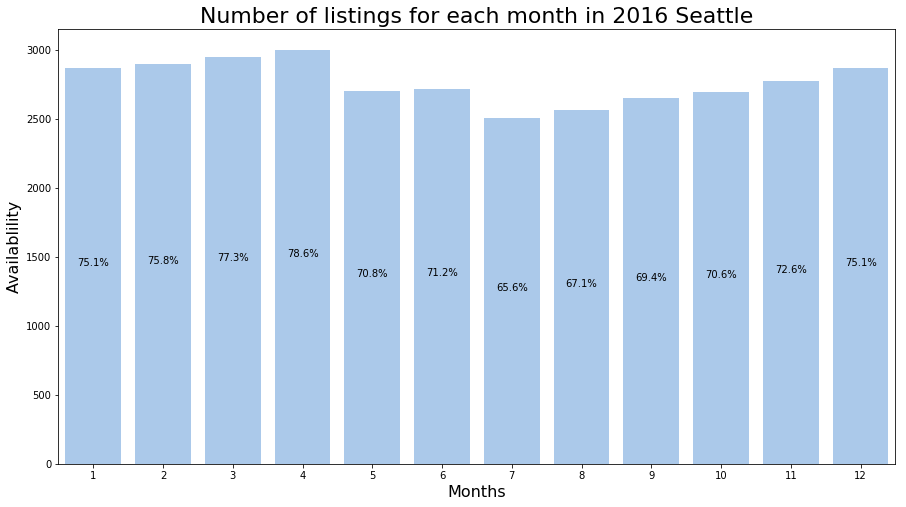

In [17]:
f, ax = plt.subplots(figsize = (15, 8))
base_color = sns.color_palette("pastel")[0]
avail_plot = sns.barplot(x= 'month', 
                         y= 'available',
                         data= monthly_avail_all,
                         color=base_color)

# Available rate of blue bar 
for index, row in monthly_avail_all.iterrows():
    avail_plot.text(row.name, row.available/2, f'{round((row.available_rate)*100,1)}%', color='black', ha="center")

# labels of the plot
avail_plot.axes.set_title("Number of listings for each month in 2016 Seattle", fontsize=22)
avail_plot.set_xlabel("Months", fontsize=16)
avail_plot.set_ylabel("Availablility", fontsize=16)

# Save the PNG file on folder
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/number_of_listings_for_each_month_in_2016.png')

plt.show()          

We are going to use the price from calendar, to evaluate how the time of the year affects the price, so we drop price in listing.

The busiest time of the year to visit Seattle in 2016 will be the month with less available listings. The period between July, August and September (Summertime) had the lowest vacancy percentages of 2016, so these 3 months would be the busiest time, do let's see will prices fluctuate with visitor tendency? If price peak happen in the July, August and September?

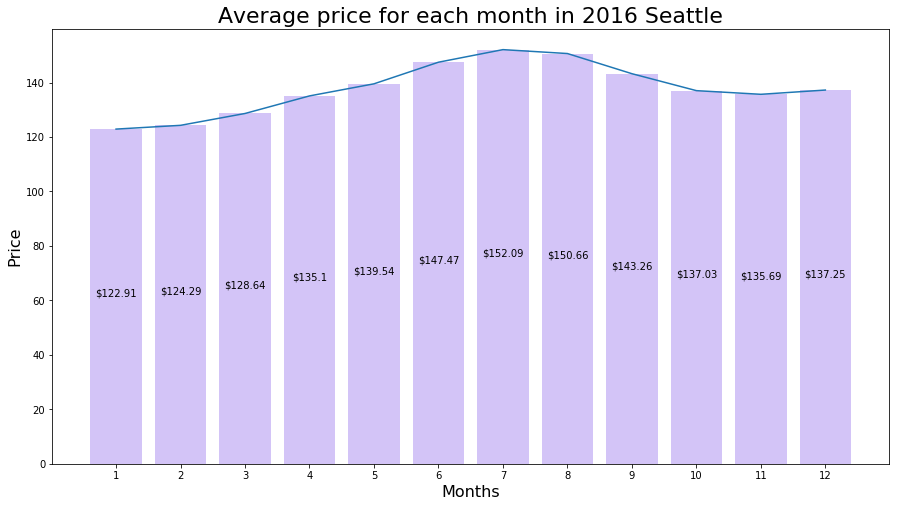

In [19]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
average_price_by_month = pd.DataFrame(data=calendar.groupby(['month'])['price'].mean(), index=range(1,13))
average_price_by_month.reset_index(level=0, inplace=True)
average_price_by_month.rename(columns = {'index':'month'}, inplace=True)

f, ax = plt.subplots(figsize = (15, 8))
base_color = sns.color_palette("pastel")[4]
price_plot = sns.barplot(x='month', 
                         y= 'price',
                         data= average_price_by_month,
                         color= base_color)


# Available rate of blue bar 
for index, row in average_price_by_month.iterrows():
    price_plot.text(row.name, row.price/2, f'${round(row.price,2)}', color='black', ha="center")

# labels of the plot
price_plot.axes.set_title("Average price for each month in 2016 Seattle", fontsize=22)
price_plot.set_xlabel("Months", fontsize=16)
price_plot.set_ylabel("Price", fontsize=16)

price_lineplot = sns.lineplot(data = average_price_by_month['price'])

#Save the PNG file on folder 
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/Average_price_for_each_month_in_2016.png')

plt.show()

From above 2 plots, we can see the most busiest times in Seattle are between July and September, and the highest average price occurs between June and August, it almost overlap each other. So we can get conclusion that prices fluctuate with visitor tendency, but not in the exactly same trend. This might caused by visitor plan ahead before busier time and the web views and bookings might bias hoster and make them increase the price proritized.

### What are the neighborhoods most requested by Airbnb customers?

Location is an important factor for visitor to consider when they pick a place to stay for the vacation. Some neighborhoods are more safe and more traffic convenient, which makes these neighborhoods are more attractive and more popular, that will affect the general price of those neighborhoods, so we can take price as reference when we analyze what are the neighborhoods most requested by Airbnb customers

### price distribution

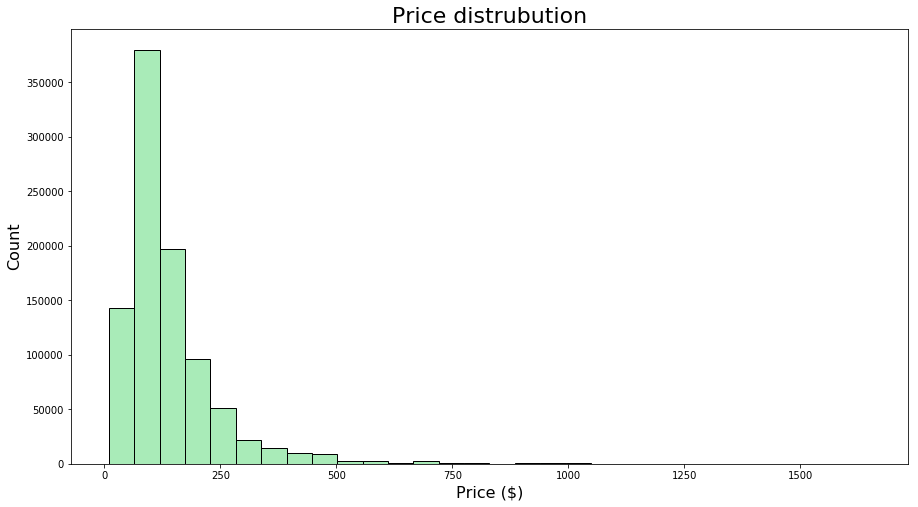

In [20]:
# Plot results
f, ax = plt.subplots(figsize = (15, 8))
base_color = sns.color_palette("pastel")[2]
price_plot = sns.histplot(x='price', 
                         data= calendar,
                         color= base_color,
                         bins = 30)

#Lables and titles
price_plot.axes.set_title("Price distrubution", fontsize=22) 
price_plot.set_xlabel("Price ($)", fontsize=16)
price_plot.set_ylabel("Count", fontsize=16)

#Save the PNG image on folder
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/Price_distribution.png')

plt.show()

we will drop outlier of price when do analysis of general relationship of neighborhood and price

In [21]:
listing = listing.rename(columns = {'id' : 'listing_id'})
df_merge = pd.merge(listing, calendar, on = 'listing_id')

# Drop column 'price' from listing_df_cleansed
df_merge.drop(columns=['price_x'], inplace = True)
df_merge.rename(columns={'price_y':'price'}, inplace=True)

# Drop rows missing 'price' values
df_merge.dropna(subset=['price'], inplace = True)

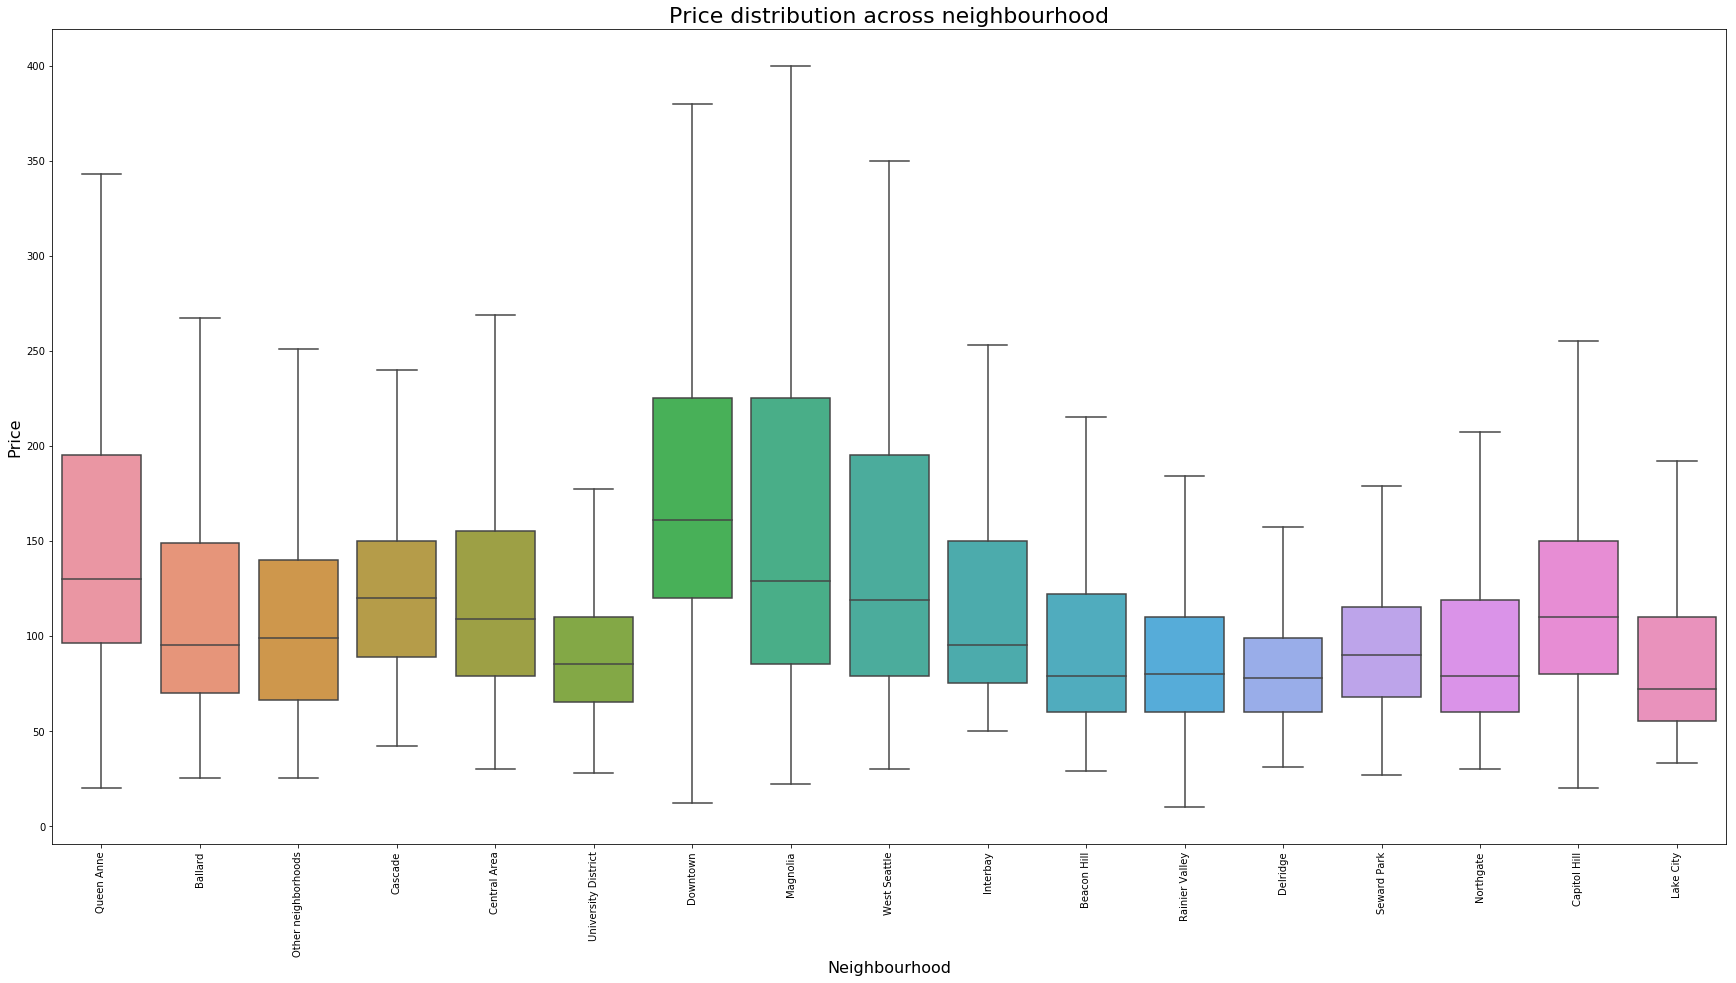

In [22]:
# Check the price variation across different neighbourhoods in Seattle to check the distribution of each

plt.figure(figsize = (30,15))
neighbourhood_plot = sns.boxplot(x='neighbourhood_group_cleansed', 
                                 y = 'price',
                                 data = df_merge.loc[df_merge['price'] <= 600],
                                 showfliers = False)

neighbourhood_plot.set_xticklabels(neighbourhood_plot.get_xticklabels(),rotation='vertical')

neighbourhood_plot.axes.set_title('Price distribution across neighbourhood', fontsize=22)
neighbourhood_plot.set_xlabel("Neighbourhood", fontsize=16)
neighbourhood_plot.set_ylabel("Price", fontsize=16)

#Save the PNG image on folder
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/Price_distribution_across_neighbourhood.png')

plt.show()

In [23]:
#list average price for each neighbourhood in every month
df_merge_subset_avg = pd.DataFrame(dtype = 'object')
df_merge_subset = df_merge.loc[(df_merge['price'] <= 600)]
df_merge_subset['month'] = pd.DatetimeIndex(df_merge_subset['date']).month
df_merge_subset_avg = pd.DataFrame(df_merge_subset.groupby(['month','neighbourhood_group_cleansed'])['price'].mean())
df_merge_subset_avg.reset_index(inplace=True)

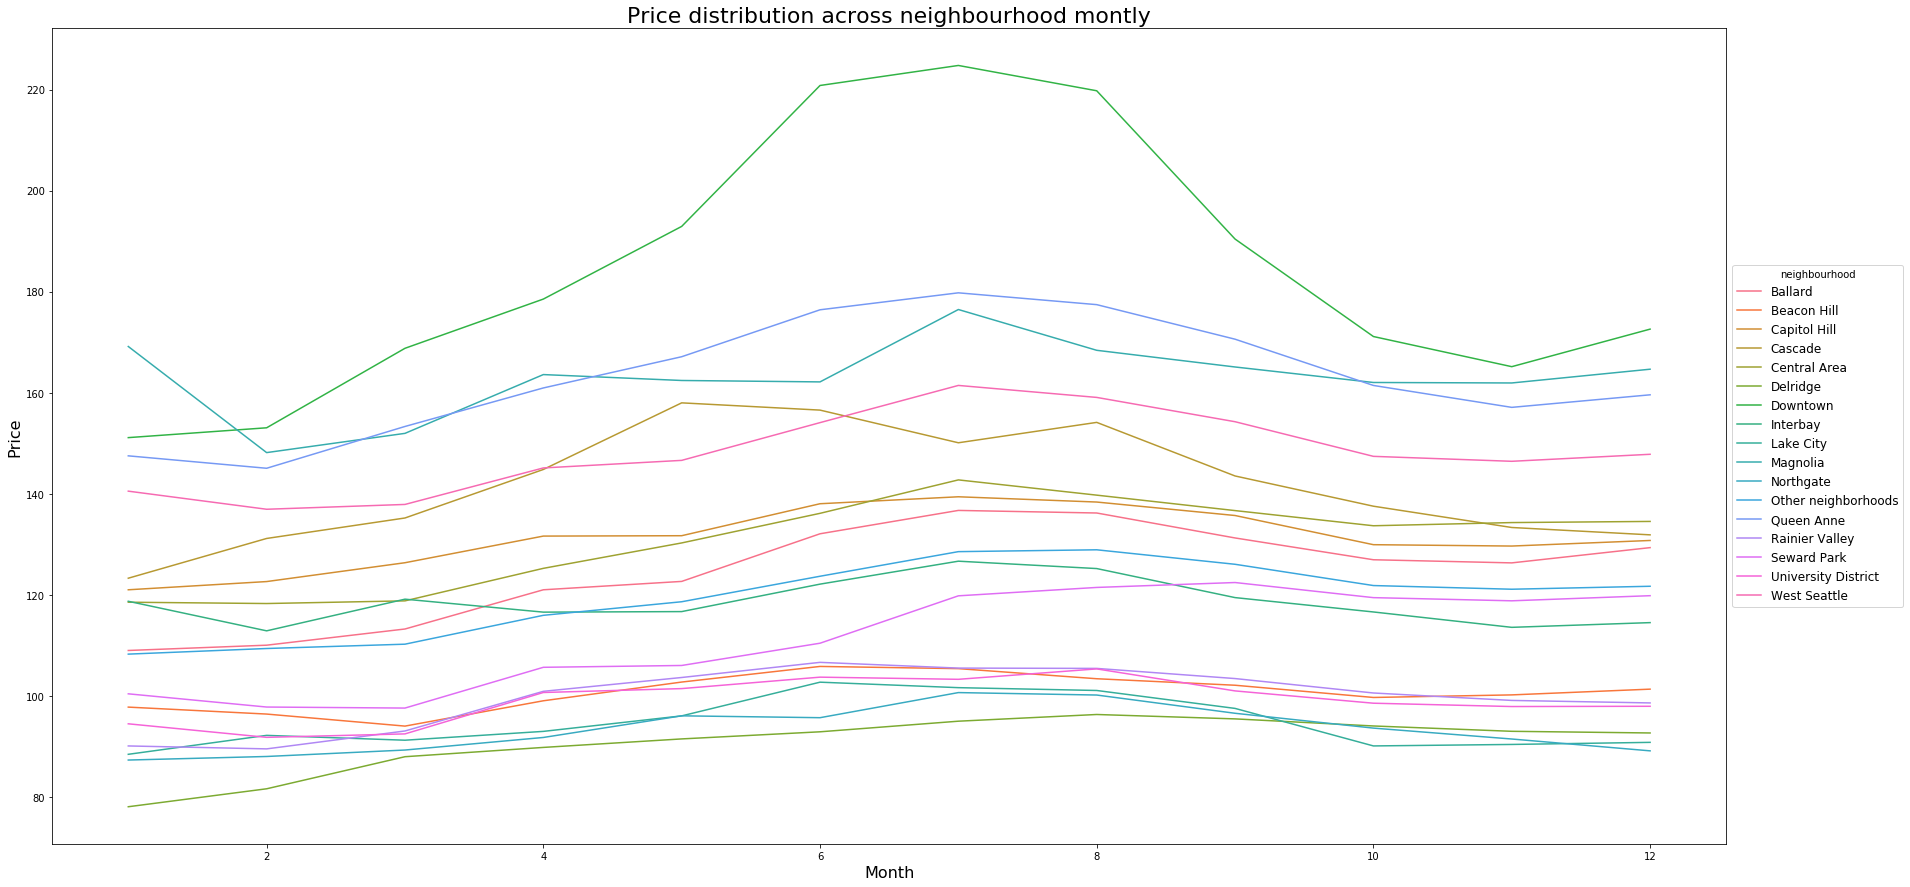

In [24]:
#Plot the price variation across different month in different neighbourhoods 

plt.figure(figsize = (30,15))
neighbourhood_monthly_plot = sns.lineplot(data=df_merge_subset_avg, 
                                          x="month", 
                                          y="price", 
                                          hue = 'neighbourhood_group_cleansed')

neighbourhood_monthly_plot.axes.set_title('Price distribution across neighbourhood montly', fontsize=22)
neighbourhood_monthly_plot.set_xlabel("Month", fontsize=16)
neighbourhood_monthly_plot.set_ylabel("Price", fontsize=16)
plt.legend(loc='center left', title='neighbourhood', bbox_to_anchor=(1, 0.5), fontsize=12)

#Save the PNG image on folder
#plt.savefig('/Users/ante/Desktop/DataScienstCourse/Image/Price_distribution_across_neighbourhood_monthly.png')

plt.show()

From above 2 plots, we can see that Downtown, Magnolia, Queen Anne are the most expensive neighbourhoods in terms of Airbnb property listings, their prices change with time went on, but overall average above 150 dollars for a day each month, and more than 75 percent hoster charge more than 100 dollars for a night, compare to other neighborhoods cannot achieve this standard, so we conclude owntown, Magnolia, Queen Anne are the neighborhoods most requested by Airbnb customers.

# Modeling: Build a Price Predictor

### Data Preprocessing and Feature Engineering

In [25]:
# Remove fields with missing values > 60 percent in above graph
listing = listing.drop(columns = ['license', 'square_feet'], axis=1, inplace=False)

In [26]:
# check categorical features that have high cardinality
categ_list = list(listing.select_dtypes('object').columns)
categ_uniq = []

for cate in categ_list:
    categ_uniq.append(len(listing[cate].unique()))
    
df_categ = pd.DataFrame({'category': categ_list, 'values': categ_uniq}).sort_values('values',ascending=False).reset_index(drop=True)
df_categ.head(5)

category  values
0  listing_url    3818  
1  picture_url    3818  
2  name           3792  
3  description    3742  
4  thumbnail_url  3499

In [27]:
# drop categorical features that have more than 1000 values
categ_drop = df_categ.category[(df_categ['values'] > 1000)].values
categ_drop

array(['listing_url', 'picture_url', 'name', 'description',
       'thumbnail_url', 'xl_picture_url', 'medium_url', 'summary',
       'amenities', 'space', 'host_url', 'host_picture_url',
       'host_thumbnail_url', 'transit', 'neighborhood_overview',
       'host_about', 'notes', 'host_name', 'street', 'host_since'],
      dtype=object)

In [28]:
listing = listing.drop(categ_drop, axis=1)

In [29]:
# drop some of the columns which would helpless to answer questions 
drop_list2 = ['first_review', 'last_review','calendar_updated','host_acceptance_rate', 'latitude', 'longitude']
listing = listing.drop(drop_list2, axis=1)

In [30]:
# Format values to easier plot
def date_format(data, col):
    ''' convert object from str to date type
    
    inputs: data = pd.DataFrame
            col = list of columns
        
    outputs: pd.DataFrame     
    '''
    data[col] = pd.to_datetime(data[col])
    
    return data

def col_toboolean(data, col):
    ''' transform t/f to 1/0
    
    inputs: data = pd.DataFrame
            col = list of columns
        
    outputs: pd.DataFrame 
    '''
    data[col] = data[col].replace({'t':1, 'f':0}, inplace = True)
    #data[col] = data[col].astype('int')
    return data

def col_topercentage(data, col):
    ''' convert object from str to float
    
    inputs: data = pd.DataFrame
            col = list of columns
        
    outputs: pd.DataFrame     
    '''
    data[col] = data[col].str.replace('%', '').astype('float')
    return data

In [31]:
#format date
calendar = date_format(calendar, 'date')
reviews = date_format(reviews, 'date')

In [32]:
# Format price 
price_list = ['weekly_price', 'monthly_price', 'price', 'security_deposit', 'extra_people']
for item in price_list:
    listing = col_moneyformat(listing, item)

In [33]:
#format boolean
bool_list = ['require_guest_phone_verification',
            'require_guest_profile_picture',
            'instant_bookable',
            'is_location_exact',
            'host_identity_verified',
            'host_has_profile_pic',
            'host_is_superhost']
for item in bool_list:
    listing = col_toboolean(listing, item)

In [34]:
# Format Percentage
percent_list = [ 'host_response_rate']
for item in percent_list:
    listing = col_topercentage(listing, item)

In [35]:
# Encode categorical list
categlist = list(listing.select_dtypes('object').columns)

Label = LabelEncoder()

for cate in categlist:    
    Label.fit(listing[cate].astype(str))
    listing[cate] = Label.transform(listing[cate].astype(str))

In [36]:
# Remove features which only have one value
drop_list3 = []

for column in listing.columns:
    if len(listing[column].unique()) == 1:
        drop_list3.append(column)
        
listing = listing.drop(drop_list3, axis=1)

### What characteristics affects the price of a listing? If general price increasing happened during the busiest time, what characteristics affected the price increasing? 

Let's draw a Heatmap to see general correlation of numeric features first

In [37]:
corrs = listing.corr()
corrs = corrs.sort_values('price', ascending = False)
corrs['price'].head()

price            1.000000
weekly_price     0.937861
monthly_price    0.873450
accommodates     0.652218
bedrooms         0.627720
Name: price, dtype: float64

In [38]:
# Remove Collinear Variables
# Set the threshold
threshold = 0.75

above_thred = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_thred[col] = list(corrs.index[corrs[col] > threshold])

cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_thred.items():

    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
cols_to_remove_pair = list(set(cols_to_remove_pair))

cols_to_remove, cols_to_remove_pair

(['beds',
  'weekly_price',
  'monthly_price',
  'smart_location',
  'neighbourhood',
  'availability_90',
  'host_total_listings_count',
  'bedrooms',
  'availability_60'],
 ['host_neighbourhood',
  'weekly_price',
  'price',
  'city',
  'availability_30',
  'bedrooms',
  'accommodates',
  'host_listings_count',
  'availability_60'])

In [39]:
listing = listing.drop(columns = cols_to_remove)

In [43]:
corrs = listing.corr()
corrs = corrs.sort_values('price', ascending = False)
feature_col = list(corrs['price'].head(10).index)
feature_col = feature_col + list(corrs['price'].tail(10).index)
corr = listing[feature_col].corr()

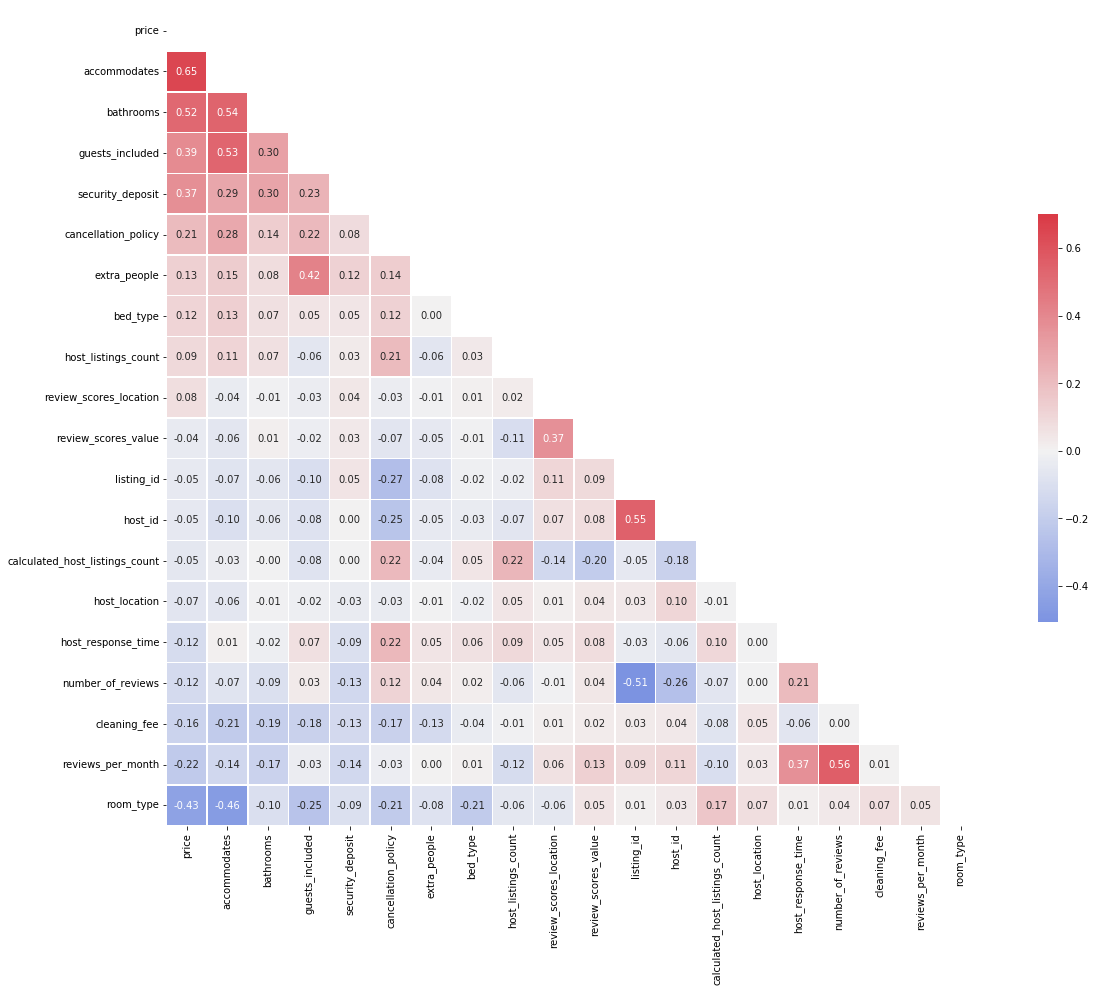

In [45]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
#sns.set(font_scale=1)
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,fmt = '.2f',
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

fig = heatmap.get_figure()

from the heatmap, we can see that infrastructure have a huge impact on price

#### Prepare Training and Testing data for pricce prediction

In [46]:
df_X = listing.drop('price', axis=1)
y = listing.price

feature_importance = pd.DataFrame()
feature_importance['feature'] = df_X.columns

# missing value fill
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_X)
df_X = imputer.transform(df_X)

#Transform Feature
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(df_X)
df_train = scaler.transform(df_X)

X_train, X_test, y_train, y_test = train_test_split( df_X, y, test_size=0.2, random_state=42)

### Linear Regression

In [48]:
lr = LinearRegression(normalize=True) # Instantiate
lr.fit(X_train, y_train) #Fit
y_pred = lr.predict(X_test)
print("R2: ", r2_score(y_test, y_pred))
print("MAE:", median_absolute_error(y_test, y_pred))

R2:  0.5687833269410819
MAE: 25.93131440818376


### Decision Tree Regression

In [49]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("R2: ", r2_score(y_test, y_pred))
print("MAE:", median_absolute_error(y_test, y_pred))

R2:  0.2925306889624737
MAE: 25.0


### Random Forest Regression

In [51]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R2: ", r2_score(y_test, y_pred))
print("MAE:", median_absolute_error(y_test, y_pred))

R2:  0.6354152548853329
MAE: 22.596573684481797


In [52]:
feature_importance['coeff_rf'] = rf.feature_importances_

In [53]:
def plot_feature_importances(df, top_N):
    
    """
    Description: 
    This function is to visualize the top N important features with their normalized importance
    
    Arguments:
    df: the dataframe with all features ranked by normalized importance
    top_N: input the number N for selecting top N features
    
    Return:
    None
    
    """
    
    #Sort features according to importance
    df = df.sort_values('coeff_rf', ascending = False).reset_index()
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (12, 10))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:top_N]))), 
            df['coeff_rf'].head(top_N), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:top_N]))))
    ax.set_yticklabels(df['feature'].head(top_N))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    # Plot labeling
    plt.xlabel('Feature Importance', fontsize=8)
    plt.title('Feature Importances', fontsize=8)
    plt.show()
    
    #return df

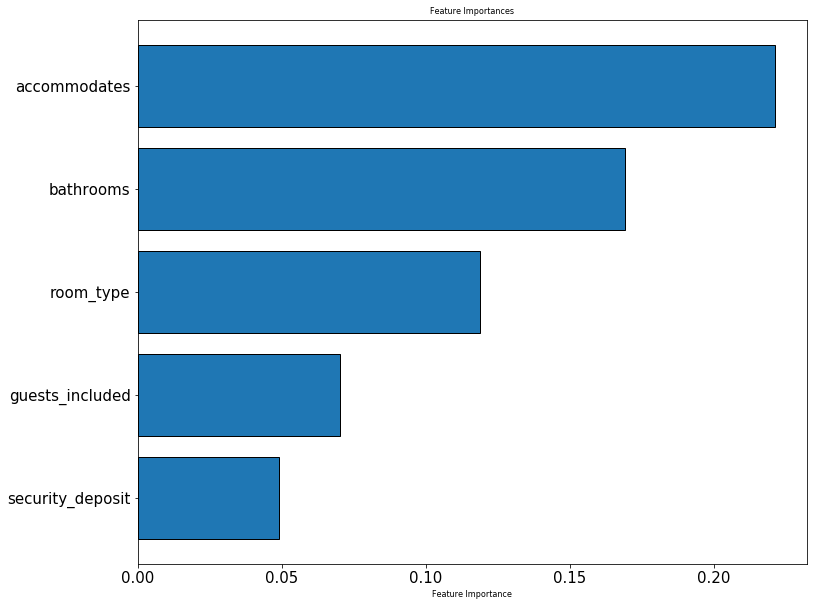

In [54]:
plot_feature_importances(feature_importance, top_N=5)

#### Analyze Importance Features

In [55]:
def group_result(feature, label, df_list):
    
    """
    Description: Count and average the price by a certain feature
    
    Arguments:
    feature: the certain feature for the label to group by
    label: for this special function the labeled data is the price
    df_list: the original dataframe
    
    Return:
    The final result/dataframe with the price count and mean for each value of the feature
    
    """
    
    df = df_list[[feature,label]].groupby(feature).count().reset_index()
    df = df.rename(columns = {label:'Counts'})
    df1 = df_list[[feature,label]].groupby(feature).mean().reset_index()
    df1 = df1.rename(columns = {label:'Mean'})

    df = df.merge(df1, on = feature, how='left').sort_values('Counts',ascending=False)
    
    return df

In [56]:
df_accomm = group_result('accommodates', 'price', listing)
df_accomm.head()

accommodates  Counts        Mean
1  2             1627    91.296865 
3  4             785     140.273885
2  3             398     111.600503
5  6             332     198.572289
0  1             256     58.375000

In [57]:
df_bathrooms = group_result('bathrooms', 'price', listing)
df_bathrooms.head()

bathrooms  Counts        Mean
2  1.0        2882    106.685982
4  2.0        373     191.737265
3  1.5        248     130.060484
5  2.5        124     256.677419
6  3.0        64      275.453125

In [59]:
df_roomtype = group_result('room_type', 'price', listing)
df_roomtype.head()

room_type  Counts        Mean
0  0          2541    155.843369
1  1          1160    75.044828 
2  2          117     47.547009

In [60]:
df_deposit = group_result('security_deposit', 'price', listing)
df_deposit.head()

security_deposit  Counts        Mean
2   100.0             348     104.893678
16  200.0             283     126.363958
21  300.0             235     162.527660
19  250.0             232     143.060345
30  500.0             230     189.173913

In [61]:
df_guests = group_result('guests_included', 'price', listing)
df_guests.head()

guests_included  Counts        Mean
1  1                2275    117.860659
2  2                989     112.139535
4  4                237     188.814346
0  0                92      107.836957
3  3                80      136.912500

In [62]:
def linear_plot_feature(df, color):
    
    """
    Description: visualize the relation between the price mean and the feature values
    
    Arguments:
    df: the imported dataframe for visualization
    color: what is the color for the data points
    """
    
    fig = plt.subplots(figsize=(10, 8))
    
    feature = df.columns[0]
    #color = 'blue'

    x = df[df[feature]!=0][feature]
    y = df[df[feature]!=0].Mean
    
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)
    
    plt.scatter(x, y, c=color, s = 100)
    plt.plot(x, poly1d_fn(x), ':')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Averaged Price', fontsize=15)
    plt.title(feature +' - Price Relation',  fontsize=15)

    plt.show()   

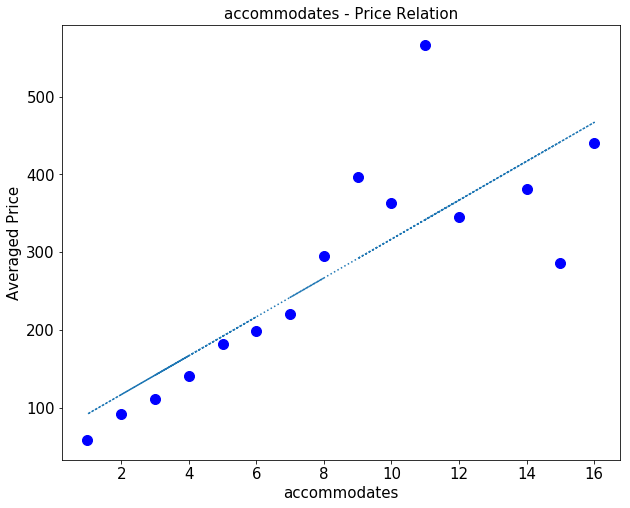

In [63]:
linear_plot_feature(df_accomm, 'blue')

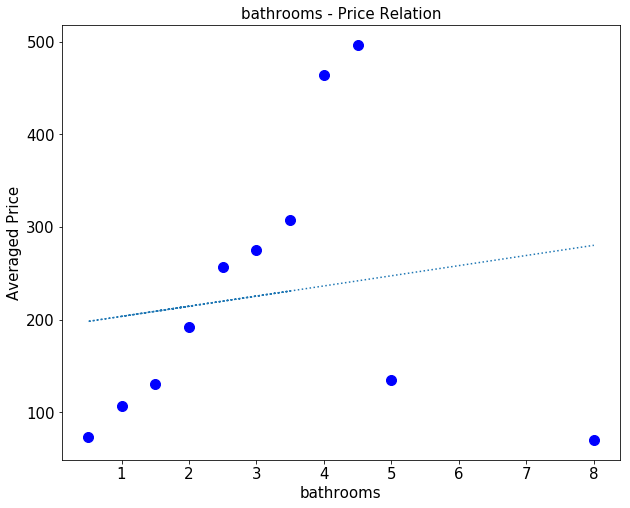

In [67]:
linear_plot_feature(df_bathrooms, 'blue')

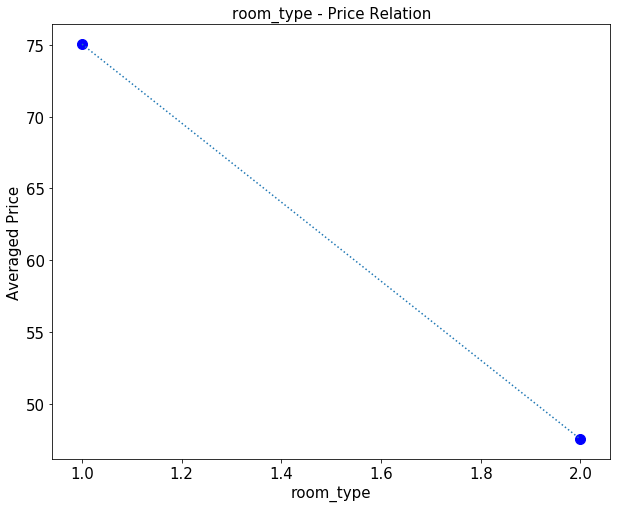

In [65]:
linear_plot_feature(df_roomtype, 'blue')

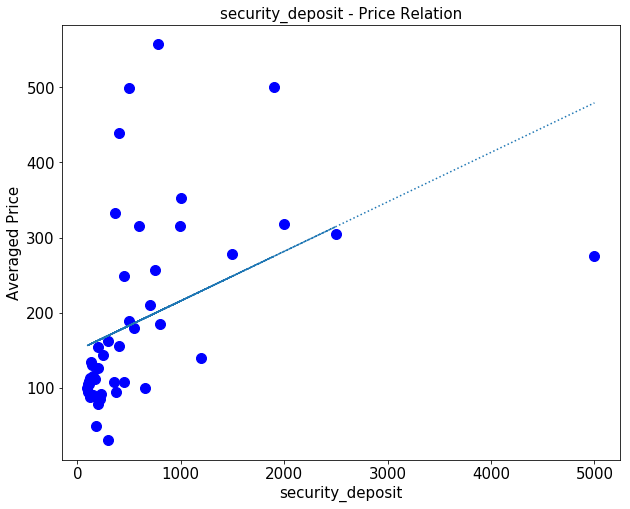

In [66]:
linear_plot_feature(df_deposit, 'blue')

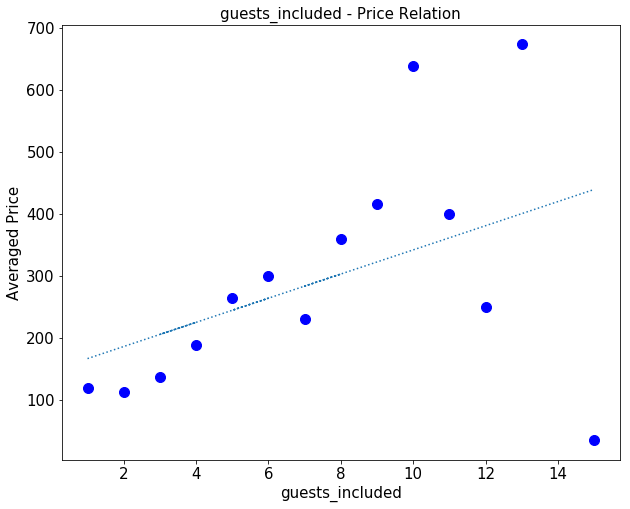

In [68]:
linear_plot_feature(df_guests, 'blue')